# Prédiction du prix d'une maison
## Nettoyage et analyse des données

Import de package et des données sous forme de dataframe pandas

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploration sommaire


In [104]:
# number of rows and columns

df.shape

(21613, 21)

In [105]:
#name of columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [106]:
#types of data
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [107]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [108]:
# search missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [109]:
# Search missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [110]:
# statistical resume of the sataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [111]:
#seach duplicates
df.duplicated().sum()

0

In [112]:
df[df[['long', 'lat', 'date']].duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4348,3856904560,20141125T000000,562000.0,4,1.75,2060,4080,1.5,0,0,...,7,1460,600,1922,1996,98105,47.6698,-122.325,1620,4080
14411,6852700477,20140916T000000,550000.0,2,1.50,1300,2970,1.0,0,0,...,7,990,310,1903,0,98102,47.6233,-122.319,1700,3000
16191,2767600920,20141027T000000,465000.0,2,1.00,730,2600,1.0,0,0,...,6,730,0,1918,0,98107,47.6751,-122.379,1480,3900
18211,6817801020,20140821T000000,475000.0,3,1.50,1930,11092,1.0,0,0,...,7,1500,430,1983,0,98074,47.6340,-122.033,1230,10964
18242,9828701745,20150123T000000,480000.0,2,1.00,710,4800,1.0,0,0,...,6,710,0,1950,0,98112,47.6212,-122.298,1480,1721
18362,8857320120,20150310T000000,542000.0,2,2.25,1800,2819,2.0,0,2,...,9,1800,0,1979,0,98008,47.6104,-122.113,1800,2755
19152,9325200120,20140909T000000,600600.0,4,3.50,3110,6829,2.0,0,0,...,8,3110,0,2014,0,98148,47.4349,-122.328,2910,7425
19992,1972200553,20140804T000000,619000.0,3,2.25,1650,946,3.0,0,0,...,8,1650,0,2014,0,98103,47.6536,-122.354,1570,1283
20357,9492500170,20140723T000000,879950.0,4,2.75,3020,7203,2.0,0,0,...,9,3020,0,2014,0,98033,47.6948,-122.178,3010,7215
20825,255450030,20140918T000000,369946.0,3,2.50,2420,4725,2.0,0,0,...,8,2420,0,2014,0,98038,47.3710,-122.018,2370,4200


In [113]:
df[['long', 'lat', 'date', 'price']].duplicated().sum()

0

### Fonction de masse de probabilité du prix des maisons(probabiliy mass function)


Text(0, 0.5, 'PMF')

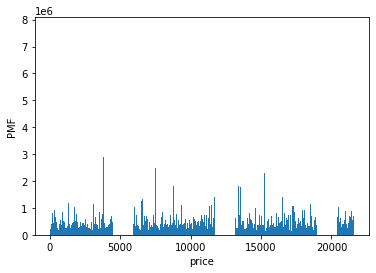

In [114]:
from empiricaldist import Pmf
price= df['price']
pmf_price = Pmf(price)
pmf_price.bar()

plt.xlabel('price')
plt.ylabel('PMF')

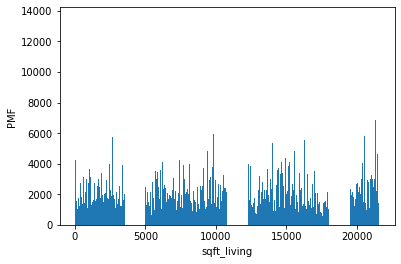

Text(0, 0.5, 'PMF')

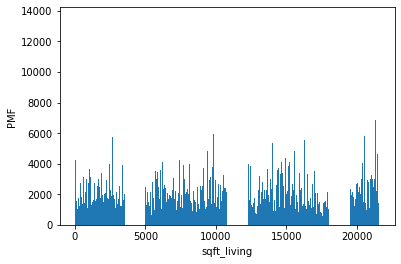

In [115]:
sqre_liv= df['sqft_living']
pmf_sqr_liv = Pmf(sqre_liv)
pmf_sqr_liv.bar()

plt.xlabel('sqft_living')
plt.ylabel('PMF')

A ce stade je me demande si la combinaison de 4 motdel adapté à chaque

Cdf: fonction de distribution cumulative
comme la pmf mais cumulative

In [122]:
from empiricaldist import Cdf

cdf_price= Cdf(price)
cdf_price(3000)

array(307450.)

## Normalisation

In [116]:

def normalize(data):
    for i in range(0,data.shape[1]-1):
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))